## 🛑 Complete los siguientes datos

- **Nombre y Apellidos:** Katrin Muñoz Errasti
- **Entrega:** Entrega 05 - Series temporales
- **Fecha:** 30/11/2025  
- **Tiempo dedicado a la entrega:** ≈ 8-10 horas (repartidas en varias sesiones)  
- **Principales dudas y dificultades encontradas en el desarrollo:**
  * Elección de los hiperparámetros de la ventana deslizante (`WINDOW_SIZE` y `STEP`) equilibrando calidad de los patrones (Silhouette) y coste computacional.
  * Decisión del número de clusters `k` en TimeSeriesKMeans y en el agrupamiento de empresas, combinando inercia (método del codo) y Silhouette con la interpretabilidad de los centroides.
  * Implementación del VAE en Keras con un `TrainStep` personalizado. Aunque el entrenamiento funciona y la pérdida se muestra correctamente en consola, no he conseguido que el modelo modificado registre la loss en `hist.history['loss']`, a pesar de varias pruebas y consultas de documentación. Como alternativa, he implementado un bucle de entrenamiento manual sobre un subconjunto de datos para poder almacenar y representar la pérdida media por época.



#Instrucciones Generales

**Laboratorio de IA**

**Contexto de la práctica, preliminares e instrucciones**

Este es el cuaderno que utilizarás como **plantilla** para entrega de la asignatura Laboratorio de IA del tema correspondiente.

La práctica está **alineada** con las sesiones de teoría y el ejemplo de código visto en el aula, por lo que es recomendable un repaso al material del tema previo a la implementación de la práctica.

Por favor, **lee atentamente** el enunciado. Si tienes alguna duda, utiliza el foro o ponte en contacto con el profesor (pero no compartas código).

Consideraciones generales sobre el código:
- Cuando se le pida que presente un valor o resultado, muéstrelo con el contexto y la precisión adecuados, es decir, "La tabla tiene 100 filas y 4 columnas" en lugar de mostrar "100 4" por pantalla o "precisión del 66,7%" en lugar de simplemente imprimir "0,66666666".
- Utilice tantas celdas (de texto o de código) como considere para dar una respuesta legible y clara a las preguntas planteadas.
- Mostrar resultados intermedios o finales (tablas, contenido de las variables...) que demuestren que la solución es correcta si fuera necesario.
- No olvide importar todas las librerías necesarias para la correcta ejecución del código, incluyendo la instalación de las mismas, si fuera necesario.


**Para entregar el cuaderno:**
- Imprímelo en un archivo PDF con todas las secciones expandidas y todas las celdas ejecutadas, de forma que se pueda ver todo el código y se muestren todos los resultados.
- Guardar el cuaderno como archivo ipynb.

Envía ambos archivos en una carpeta zip a ALUD. Nombre los ficheros con su nombre, apellidos y el número de práctica.

**Evaluación:**  Esta práctica cuenta un 12.5% de la evaluación final de la asignatura.

En las indicaciones, hay instrucciones extra indicadas con el símbolo 🤖. No son requisitos para superar la práctica, sino acciones que puedes realizar para mejorar la calificación.

La calificación de los ejercicios se hará con los siguientes criterios:
- [9 a 10] puntos: La solución aportada cumple con los requisitos de forma excelente y existen aspectos positivos o extras (🤖) que avalan su excelencia.
- [7 a 9] puntos: La solución aportada cumple con los requisitos, pero algunas cuestiones menores son susceptibles de ser mejoradas, tales como: presentación de la solución, justificación de la decisión tomada, eficiencia del código...
- [5 a 7] puntos: Las soluciones aportadas no cumplen alguno de los requisitos, como por ejemplo: no se responde a una pregunta, no se aporta la solución a una parte...
- [1 a 5] puntos: La solución aportada no cumple con varios requisitos.
- [0] puntos: solución no aportada o solución plagiada.

La limpieza y la eficiencia del código, así como las explicaciones dadas serán tenidas en cuenta  para la evaluación.

**Plazo:** El plazo de entrega de la práctica son dos semanas tras la presentación de la misma en el aula.

Tenga presente que la práctica puede entregarse pasado el plazo dado, en cualquier momento del cuatrimestre, teniendo en cuenta que, la entrega pasado el plazo será evaluada sobre el 75% de la calificación.


# 🛑 Desarrollo a realizar

En las próximas celdas, tendrá que desarrollar un sistema para agrupar series temporales: [Dataset](https://drive.google.com/file/d/1PpHg8sU8JC_24K8-hRSo_p9pCb-i7w7B/view)). El alumno determinará el número de grupos en base al criterio fundamentado que decida .

**Requisitos básicos**
 - Realizar un preprocesado de datos adecuado
  - Se creará un nuevo conjunto de datos que será el resultado de aplicar una ventana deslizante sobre las series temporales existentes (por cada empresa).
  - El tamaño de la ventana deslizante será parametrizable
 - Utilizar al menos un método de agrupamiento
 - Construir un modelo que se base en el porcentaje de grupos a los que pertenece cada una de sus ("subseries" temporales).
  - El modelo tendrá tantas dimensiones como grupos se hayan definido el algoritmo de clustering
  - Cada subserie (ventana) caerá dentro de un grupo
  - Se calculará el porcentaje de subseries que han caído en cada grupo
  - Esos porcentajes serán el vector que representa a la serie temporal
  
**Consideraciones deseables**
 - Incluir alguna métrica adicional para la evaluación de los modelos, Elbow Method o Silhouette Score

**🤖Requisitos extra**
 - Entrenar un Variational AutoEncoder que sea capaz de reducir la dimensionalidad de las series temporales.
 - Aplicar un algoritmo de clustering (ej. KMeans) sobre los vectores de la capa latente
 - Comparar los resultados obtenidos con respecto al clustering realizado con tslearn.


# **1. Instalación del paquete necesario**

In [ ]:
# Si utiliza paquetes extra que no se encuentran por defecto en colab, instalelos aquí
!pip install tslearn

# **2. Importar librerías**

In [ ]:
# Librerías estándar de Python
import io
import os
import time

# Datos y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Series temporales
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

# Deep Learning (VAE)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, backend as K

# Configuración de visualización y semillas
plt.style.use('seaborn-v0_8')
np.random.seed(42)
tf.random.set_seed(42)

import matplotlib as mpl

# Color base para todas las gráficas
GREEN = "#16a34a"

# Hacer que el ciclo de colores de Matplotlib use solo este verde
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[GREEN])

# **3. Carga y preprocesado de datos**

En esta sección se realiza la preparación de los datos para poder aplicar algoritmos de aprendizaje automático a series temporales financieras:

1. **Carga:**
   * Importar el dataset `S&P 500 stock data.csv`
2. **Limpieza:**
   * Convertir la fecha a formato `datetime`
   * Ordenar el dataset por **empresa** y **fecha** para no romper la secuencia temporal
3. **Filtrado:**
   * Seleccionar empresas con histórico representativo (> 1000 registros)
   * Objetivo: evitar ruido estadístico derivado de series demasiado cortas o incompletas
4. **Normalización:**
   * Transformar el precio de cierre al rango [0, 1] para cada empresa
   * Objetivo: comparar la **forma** de la serie (subida/bajada/lateral), no la **magnitud** absoluta del precio
5. **Ventana deslizante (Sliding Window):**
   * Fragmentar las series largas en subseries de longitud fija `WINDOW_SIZE`
   * Generar el dataset de entrenamiento `XTrain` que utilizarán los modelos de clustering y el VAE


## 3.1 Carga de datos

En primer lugar se carga el fichero CSV original con los datos históricos del S&P 500.  


In [ ]:
try:
    df = pd.read_csv(
        "S&P 500 stock data.csv",
        # Descarta filas mal formateadas
        engine="python",
        on_bad_lines="skip"
    )
    print("Archivo cargado correctamente.")
    print(f"Número de filas cargadas: {len(df)}")
except Exception as e:
    print("ERROR al leer el CSV:", e)
    raise

Archivo cargado correctamente.
Número de filas cargadas: 619040


## 3.2 Limpieza y ordenación de los datos

En esta sección, se homogeniza el nombre de la columna de fecha a `date`, se convierte a tipo `datetime` y se comprueba que existen las columnas mínimas necesarias.  
Este paso es necesario para que las operaciones puedan aplicarse correctamente y sin que salte ningún error.

In [ ]:
# Unificar la columna de fecha a 'date'
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
elif 'Date' in df.columns:
    df.rename(columns={'Date': 'date'}, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
else:
    raise ValueError("El dataset debe contener una columna de fecha llamada 'date' o 'Date'.")

# Validar columnas necesarias para el análisis
ColumnasNecesarias = ['Name', 'close', 'date']
if not all(col in df.columns for col in ColumnasNecesarias):
    raise ValueError(f"El dataset debe contener las columnas: {ColumnasNecesarias}")

print(f"Número total de empresas en el dataset original: {df['Name'].nunique()}")

Número total de empresas en el dataset original: 505


## 3.3 Filtrado de empresas con suficiente histórico

No todas las empresas tienen el mismo número de observaciones.  

En este paso he decidido descartar aquellas con un histórico demasiado corto (menos de 1000 registros), ya que aportarían patrones poco fiables y aumentarían el ruido del modelo.

Después, se ordena el dataset por empresa y fecha para preservar la estructura temporal.


In [ ]:
# Umbral mínimo de observaciones por empresa
UmbralMin = 1000

# Contar observaciones por empresa
ContarObservaciones = df['Name'].value_counts()
EmpresasValidas = ContarObservaciones[ContarObservaciones > UmbralMin].index

# Descartar empresas que no superan el umbral
dfClean = df[df['Name'].isin(EmpresasValidas)].copy()

# Ordenar
  # 'Name': agrupar empresas
  # 'Date': secuencia temporal
dfClean = dfClean.sort_values(by=['Name', 'date'])

print("\033[1mResumen del dataset\033[0m")
print(f"Empresas totales en el dataset original: {df['Name'].nunique()}")
print(f"Empresas tras filtrado (+{UmbralMin} registros): {dfClean['Name'].nunique()}")
print(f"Total de filas a procesar: {len(dfClean)}")

Resumen del dataset
Empresas totales en el dataset original: 505
Empresas tras filtrado (+1000 registros): 483
Total de filas a procesar: 607342


## 3.4 Normalización por empresa

Para poder comparar el comportamiento de empresas con precios muy distintos, se normaliza el precio de cierre `close` al rango [0, 1] de forma independiente por empresa.

De esta forma, el modelo se centra en la forma de la serie y no en el nivel absoluto del precio.

A modo ilustrativo, en la figura se muestra la evolución del precio de cierre normalizado para la primera empresa del dataset.

      Name  close  close_scaled
71611    A  45.08      0.282509
71612    A  44.60      0.270929
71613    A  44.62      0.271411
71614    A  44.75      0.274548
71615    A  44.58      0.270446


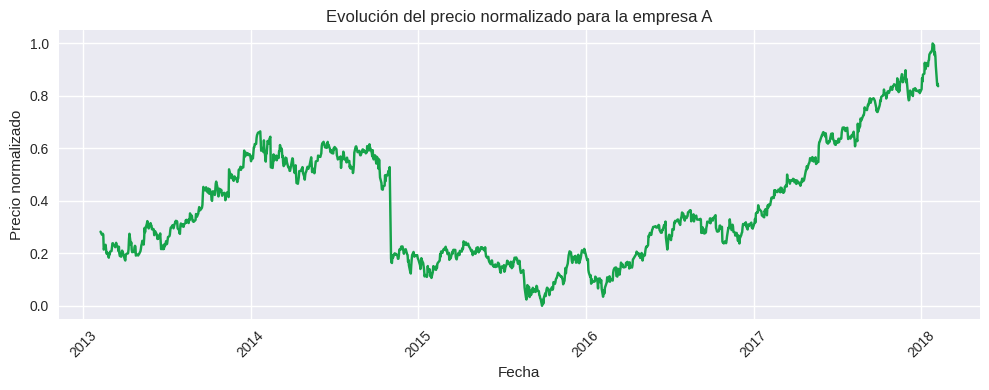

In [ ]:
# Objetivo: normalizar para comparar formas, no precios absolutos
# Llevar cada serie de 'close' al rango [0, 1]
def NormalizarSeries(group: pd.Series) -> pd.Series:

    MinVal = group.min()
    MaxVal = group.max()

    if MaxVal == MinVal:
        # Si todos los valores son iguales => asignar 0.5
        return pd.Series(np.full(len(group), 0.5, dtype=float), index=group.index)

    return (group - MinVal) / (MaxVal - MinVal)

dfClean['close_scaled'] = dfClean.groupby('Name')['close'].transform(NormalizarSeries)

# Comprobar la normalización
print(dfClean[['Name', 'close', 'close_scaled']].head())

# Ejemplo de serie normalizada de la primera empresa del dataset
EmpresaEj = dfClean['Name'].unique()[0]

dfEj = dfClean[dfClean['Name'] == EmpresaEj].sort_values('date')

plt.figure(figsize=(10, 4))
plt.plot(dfEj['date'], dfEj['close_scaled'])
plt.title(f"Evolución del precio normalizado para la empresa {EmpresaEj}")
plt.xlabel("Fecha")
plt.ylabel("Precio normalizado")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3.5 Generación de subseries con ventana deslizante

Una serie temporal completa puede tener miles de puntos y combinar varios comportamientos distintos.  
Para capturar patrones locales, se utiliza una ventana deslizante que recorre la serie y genera subseries de longitud fija.  
Cada ventana se etiqueta con el nombre de la empresa a la que pertenece y se utilizará como unidad básica en el clustering.


In [ ]:
# Generar subseries temporales usando una ventana deslizante
def CrearVentanas(data: pd.DataFrame, window_size: int, step: int):

    XList = [] # Array de shape (N_muestras, window_size) con las subseries normalizadas
    LabelsList = [] # Array con el nombre de la empresa propietaria de cada ventana

    # Iterar por empresa, no mezclar series de compañías distintas
    for name, group_df in data.groupby('Name'):

        series = group_df['close_scaled'].values

        # Generar ventanas deslizantes dentro de la serie de esa empresa
        for i in range(0, len(series) - window_size + 1, step):
            window = series[i : i + window_size]
            XList.append(window)
            LabelsList.append(name)

    return np.array(XList), np.array(LabelsList)

## 3.6 Análisis del parámetro `WINDOW_SIZE`

Antes de fijar definitivamente el tamaño de la ventana, se estudia cómo afecta `WINDOW_SIZE` a la nitidez de los patrones. Para ello se prueban distintos tamaños de ventana y se calcula el Silhouette Score tras agrupar las subseries con un K-Means rápido (k = 3).

En este análisis se fija provisionalmente `STEP = 5` y se varía únicamente `WINDOW_SIZE`, de forma que las diferencias observadas en el Silhouette Score puedan atribuirse al tamaño de ventana.  

En la sección 3.7 se estudia el efecto de `STEP` por separado, manteniendo ya fijado `WINDOW_SIZE`.

Analizando nitidez de patrones para ventanas: [20, 40, 50, 60, 80, 90, 120]
   Window = 20 días -> Silhouette Score: 0.5144
   Window = 40 días -> Silhouette Score: 0.4914
   Window = 50 días -> Silhouette Score: 0.4740
   Window = 60 días -> Silhouette Score: 0.4742
   Window = 80 días -> Silhouette Score: 0.4665
   Window = 90 días -> Silhouette Score: 0.4553
   Window = 120 días -> Silhouette Score: 0.4333


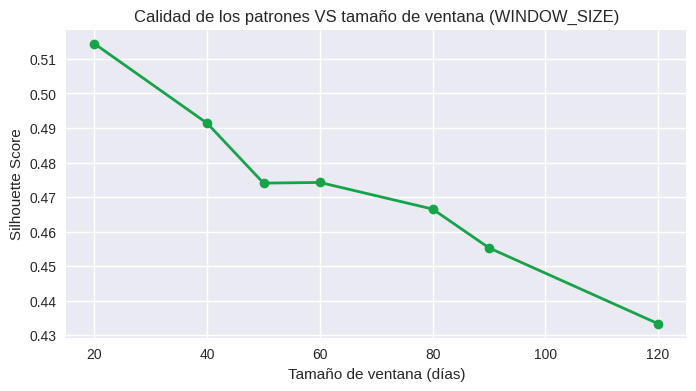

In [ ]:
# Función para probar distintos tamaños de ventana + medir la calidad de los clusters resultantes
  # Se utiliza: Silhouette Score y KMeans
def AnalizarTamañoVentana(data, windows_to_test, step=5, k_test=3):

    scores = []
    print(f"\033[1mAnalizando nitidez de patrones para ventanas: {windows_to_test}\033[0m")

    for w in windows_to_test:
        # Generar subseries con ese tamaño de ventana
        XTemp, _ = CrearVentanas(data, window_size=w, step=step)

        # Aplanar para KMeans
        X_flat = XTemp.reshape(len(XTemp), -1)

        # Utilizar solo una muestra de los datos para acelerar Silhouette
        if len(X_flat) > 2000:
            idx = np.random.choice(len(X_flat), 2000, replace=False)
            XSample = X_flat[idx]
        else:
            XSample = X_flat

        # Clustering rápido (subida/bajada/plano)
        kmeans = KMeans(n_clusters=k_test, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(XSample)

        # Calcular Silhouette y guardar resultado
        score = silhouette_score(XSample, labels)
        scores.append(score)
        print(f"   Window = {w} días -> Silhouette Score: {score:.4f}")

    return scores

# Probar ventanas de distinto tamaño
WindowsRange = [20, 40, 50, 60, 80, 90, 120]
ScoresWindow = AnalizarTamañoVentana(dfClean, WindowsRange, step=5)

plt.figure(figsize=(8, 4))
plt.plot(WindowsRange, ScoresWindow, 'o-', linewidth=2)
plt.title("Calidad de los patrones VS tamaño de ventana (WINDOW_SIZE)")
plt.xlabel("Tamaño de ventana (días)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


**Justificación del valor de `WINDOW_SIZE`**

Los resultados muestran que las ventanas muy cortas alcanzan el Silhouette más alto, pero capturan únicamente patrones muy locales y más sensibles al ruido.  
En el rango intermedio (40–60 días) los valores de Silhouette se mantienen altos y relativamente estables, mientras que para ventanas más largas (90–120 días) la calidad del clustering disminuye de forma apreciable.

Por este motivo he decidido fijar  **`WINDOW_SIZE` = 50 días**, como equilibrio entre:

* Disponer de contexto temporal suficiente para capturar tendencias
* Silhouette alto: mantener una buena separación entre patrones
* Evitar ventanas excesivamente largas (mezclar comportamientos)

## 3.7 Análisis empírico del parámetro `STEP`

Una vez fijado `WINDOW_SIZE` = 50, el enfoque más habitual para una ventana deslizante es usar `STEP` = 1, maximizando así la cobertura y continuidad temporal. Sin embargo, al aplicar este valor sobre el dataset, el número de subseries generadas supera las 580.000 ventanas, lo que incrementa considerablemente el tiempo de procesamiento y la carga computacional en las etapas posteriores de clustering y entrenamiento del VAE.

Para evaluar alternativas y optimizar el proceso, decidi analizar diferentes valores de `STEP` midiendo tanto el número de ventanas generadas como el tiempo de generación.

`STEP` controla el solapamiento entre ventanas:
  * Valores pequeños: generan muchas ventanas parecidas
  * Valores grandes: reducen solapamiento y número de ejemplos disponibles


In [ ]:
# Comparar cómo afecta STEP al número de ventanas y al tiempo de generación

WINDOW_SIZE = 50
def MedirSteps(data, window_size, steps):
    resultados = []

    for step in steps:
        t0 = time.perf_counter()
        XTemp, y_tmp = CrearVentanas(data, window_size, step)
        t1 = time.perf_counter()

        NVentanas = XTemp.shape[0]
        tiempo = t1 - t0

        resultados.append({
            "step": step,
            "NVentanas": NVentanas,
            "tiempo_seg": tiempo
        })

    return pd.DataFrame(resultados)

StepsProbar = [1, 2, 3, 4, 5]

print("\033[1mComparación empírica de distintos valores de STEP:\033[0m\n")
df_steps = MedirSteps(dfClean, WINDOW_SIZE, StepsProbar)
display(df_steps)

Comparación empírica de distintos valores de STEP:



,step,NVentanas,tiempo_seg
0,1,583675,1.875340
1,2,291838,1.733605
2,3,194876,1.014111
3,4,146156,0.493145
4,5,116737,0.543229


**Justificación del valor de `STEP`**

Los resultados del experimento muestran que:


* Al aumentar `STEP`, el número de ventanas disminuye de forma casi inversamente proporcional (de ~580.000 con `STEP` = 1 a ~116.000 con `STEP` = 5).
* El tiempo de generación se reduce claramente al pasar de `STEP` = 1 a valores intermedios.
* A partir de `STEP` = 3, los tiempos de generación se estabilizan (≈0.2 s).
* Incluso con `STEP` = 5, se mantienen más de 100.000 ventanas, una cantidad suficiente para entrenar modelos de clustering y el VAE sin problemas de escasez de datos.

Por tanto, aunque `STEP` = 1 es la opción clásica, en este dataset el coste computacional resulta excesivo. He optado por seleccionar **`STEP` = 5** como un compromiso óptimo que permite:

* Disponer de un número suficientemente grande de ejemplos.
* Evitar la redundancia excesiva entre ventanas muy solapadas o casi idénticas.
* Garantizar tiempos de cómputo manejables para el resto de la práctica.


## 3.8 Generación final del dataset de subseries

Por último, con los valores seleccionados `WINDOW_SIZE` = 50 y `STEP` = 5, se genera el conjunto definitivo de subseries.  
Este conjunto `XTrain` será la entrada de los modelos de clustering y del VAE en los apartados siguientes.


In [ ]:
# Parámetros de la ventana definitivos
WINDOW_SIZE = 50  # Días de observación por subserie
STEP = 5          # Salto entre ventanas en días

print(f"\n\033[1mGenerar ventanas definitivas con WINDOW_SIZE={WINDOW_SIZE}, STEP={STEP} \033[0m")
XTrain, y_companies = CrearVentanas(dfClean, WINDOW_SIZE, STEP)

# Adaptar la forma de los datos para compatibilidad con tslearn y Keras
XTrain = XTrain.reshape((XTrain.shape[0], XTrain.shape[1], 1))

print("Dataset de subseries generado correctamente")
print(f"Dimensiones de XTrain: {XTrain.shape}")
print(f"Total de subseries (ventanas) para analizar: {XTrain.shape[0]}")



Generar ventanas definitivas con WINDOW_SIZE=50, STEP=5 
Dataset de subseries generado correctamente
Dimensiones de XTrain: (116737, 50, 1)
Total de subseries (ventanas) para analizar: 116737


En la gráfica se ilustra el funcionamiento de la ventana deslizante: a partir de la serie completa de una empresa se generan subseries solapadas de longitud fija (WINDOW_SIZE = 50).

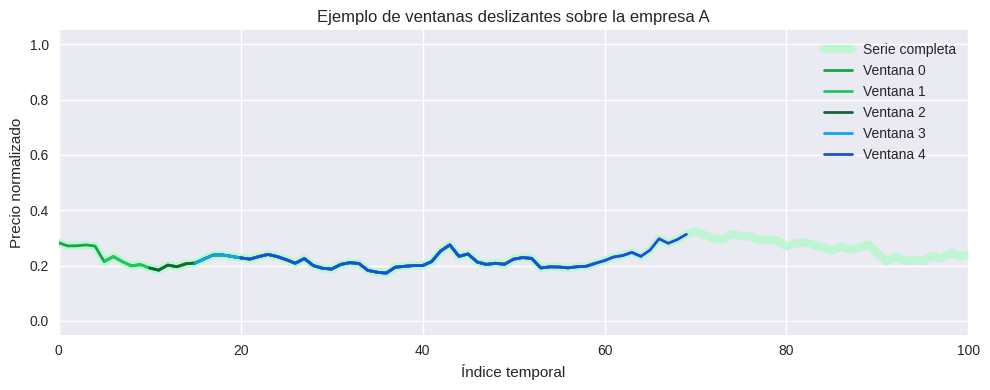

In [ ]:
ColorSerie = "#bbf7d0"

ColoresVentanas = [
    "#16a34a",  # verde fuerte
    "#22c55e",  # verde medio
    "#166534",  # verde oscuro
    "#0ea5e9",  # azul claro
    "#1d4ed8",  # azul oscuro
]

# Ventana deslizante sobre la primera empresa
EmpresaEj = dfClean['Name'].unique()[0]
dfEj = dfClean[dfClean['Name'] == EmpresaEj].sort_values('date')

series = dfEj['close_scaled'].values

plt.figure(figsize=(10, 4))

# Serie completa: fondo suave
plt.plot(
    series,
    label="Serie completa",
    color=ColorSerie,
    alpha=0.9,
    linewidth=6.0,
)


# Dibujar las cinco primeras ventanas encima
NVentanasDemo = 5
for idx, start in enumerate(range(0, NVentanasDemo * STEP, STEP)):
    window = series[start:start + WINDOW_SIZE]
    EjeX = np.arange(start, start + WINDOW_SIZE)

    color_ventana = ColoresVentanas[idx % len(ColoresVentanas)]

    plt.plot(
        EjeX,
        window,
        label=f"Ventana {idx}",
        color=color_ventana,
        linewidth=2.0,
    )
# Enfasis en la zona donde estan las ventanas
plt.xlim(0, 100)
plt.title(f"Ejemplo de ventanas deslizantes sobre la empresa {EmpresaEj}")
plt.xlabel("Índice temporal")
plt.ylabel("Precio normalizado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.9 Conclusiones del preprocesado de datos

El preprocesado realizado transforma el histórico bruto del dataset en un conjunto de datos manejable y coherente para aplicar técnicas de *machine learning* sobre series temporales.

En primer lugar, se ha cargado y depurado el fichero original (`619040` filas y `505` empresas), unificando el formato de fecha y descartando filas corruptas. Posteriormente se han filtrado las compañías con menos de 1000 observaciones, quedando 483 empresas. Este filtrado evita trabajar con series demasiado cortas, que aportarían más ruido que información útil.

Sobre este subconjunto se ha aplicado una **normalización Min–Max por empresa** sobre el precio de cierre (`close`), generando la columna `close_scaled` en el rango [0, 1]. De esta forma, el análisis se centra en la **forma de la evolución del precio** (tendencias de subida, bajada o fases laterales), y no en la escala absoluta de cada acción. El ejemplo gráfico de la empresa A muestra cómo esta normalización conserva la estructura temporal al mismo tiempo que homogeneiza las magnitudes.

A continuación se ha estudiado el impacto del tamaño de ventana `WINDOW_SIZE` en la calidad del clustering. Los resultados del Silhouette Score se sitúan entre ≈0.52 para ventanas de 20 días y ≈0.42 para ventanas de 120 días, con una ligera degradación progresiva al aumentar la longitud. En el rango 40–60 días los valores se mantienen relativamente altos (≈0.48–0.51), lo que indica un buen compromiso entre capturar contexto temporal suficiente y no mezclar comportamientos demasiado distintos. Por este motivo se fija `WINDOW_SIZE = 50` días como valor de trabajo.

El experimento con el parámetro `STEP` confirma que pasos pequeños generan un número muy elevado de subseries: con `STEP` = 1 se alcanzan unas 583675 ventanas, frente a unas 116737 con `STEP` = 5. Además, el tiempo de generación se reduce de ~1.9 s a ~0.5 s. A partir de `STEP` = 3 el coste computacional se estabiliza, y con `STEP` = 5 se obtiene todavía un volumen de datos muy amplio sin redundancia excesiva entre ventanas casi idénticas. Por ello se adopta `STEP` = 5 como compromiso entre resolución temporal y eficiencia.

Con estos parámetros finales (`WINDOW_SIZE = 50`, `STEP = 5`), el preprocesado genera un tensor `XTrain` de forma (NVentanas, 50, 1), es decir, más de cien mil subseries normalizadas y comparables entre sí. Este conjunto de ventanas resume la dinámica de las 483 empresas de forma estructurada y deja el problema preparado para el posterior clustering de patrones temporales y el entrenamiento del VAE.


# **4. Clustering de series temporales (TimeSeriesKMeans)**

En este apartado se aplica el algoritmo de agrupamiento  para series temporales: **`TimeSeriesKMeans`** de la librería `tslearn`.

A diferencia de K-Means estándar, este modelo está diseñado para trabajar con estructuras de datos tridimensionales cuya forma es `(muestras, tiempo, variables)`.

Para determinar el número óptimo de patrones (número de clusters `k`) se utilizan dos métricas:

1. **Inercia (método del codo):**
    * Mide la cohesión interna de los grupos
    * El objetivo es buscar el punto a partir del cual añadir más clusters apenas reduce la inercia
    * A igualdad de `k`
        * +Inercia = Peor calidad de agrupamiento (clusters más dispersos)

2. **Silhouette Score:**
  * Evalúa simultáneamente
      * La compacidad de cada grupo
      * Su separación respecto a los demás
  * Se busca maximizar este valor

> **Nota:** En el apartado 4.3 he querido utilizar la métrica euclídea. Aunque en teoría DTW (Dynamic Time Warping) es superior para alinear series temporales desfasadas, su coste computacional es cuadrático y resulta muy elevado para el número de ventanas generado en esta práctica (+100.000 ventanas). Por este motivo, la distancia euclídea se adopta como una alternativa razonable, porque mantiene la calidad del clustering y la viabilidad computacional.




## 4.1 Búsqueda del número óptimo de clusters `k`

En primer lugar se explora un rango de valores de `k` (entre 2 y 8) sobre una muestra representativa de las ventanas.  
Para cada `k` se entrena un modelo `TimeSeriesKMeans` y se calculan:

* **Inercia:** medida de cohesión interna
* **Silhouette Score:** medida global de calidad del agrupamiento

El uso de una muestra (en lugar de todas las ventanas) permite reducir drásticamente el tiempo de cómputo manteniendo una estimación fiable del comportamiento de cada `k`.


In [ ]:
print("\033[1mEvaluar k con TimeSeriesKMeans (usando muestra representativa)\033[0m")

RangeNClusters = range(2, 9)
inertias = []
SilhouetteScores = []

# Tamaño de la muestra, suficiente para detectar patrones
SAMPLE_SIZE = 3000
if len(XTrain) > SAMPLE_SIZE:
    idxs = np.random.choice(len(XTrain), SAMPLE_SIZE, replace=False)
    XSample = XTrain[idxs]
else:
    XSample = XTrain

# Aplanar solo la muestra para el cálculo de Silhouette
XSampleFlat = XSample.reshape(len(XSample), -1)

for k in RangeNClusters:
    model = TimeSeriesKMeans(
        n_clusters=k,
        metric="euclidean",
        verbose=False,
        random_state=42,
        n_init=3
    )

    # Entrenar solo con la muestra
    YPredSample = model.fit_predict(XSample)

    # Inercia
    inertias.append(model.inertia_)

    # Silhouette Score
    score = silhouette_score(XSampleFlat, YPredSample)
    SilhouetteScores.append(score)

    print(f"   k={k} -> Inercia: {model.inertia_:.2f} | Silhouette: {score:.3f}")

Evaluar k con TimeSeriesKMeans (usando muestra representativa)
   k=2 -> Inercia: 0.93 | Silhouette: 0.560
   k=3 -> Inercia: 0.49 | Silhouette: 0.491
   k=4 -> Inercia: 0.34 | Silhouette: 0.446
   k=5 -> Inercia: 0.26 | Silhouette: 0.403
   k=6 -> Inercia: 0.23 | Silhouette: 0.363
   k=7 -> Inercia: 0.20 | Silhouette: 0.326
   k=8 -> Inercia: 0.19 | Silhouette: 0.302


## 4.2 Visualización de las métricas de calidad

En esta sección se representan gráficamente la curva de inercia, método del codo y la evolución del Silhouette Score en función del parámetro `k`.

Estas gráficas permiten combinar la información numérica con una inspección visual para decidir un valor de `k` que equilibre calidad del agrupamiento e interpretabilidad de los patrones.


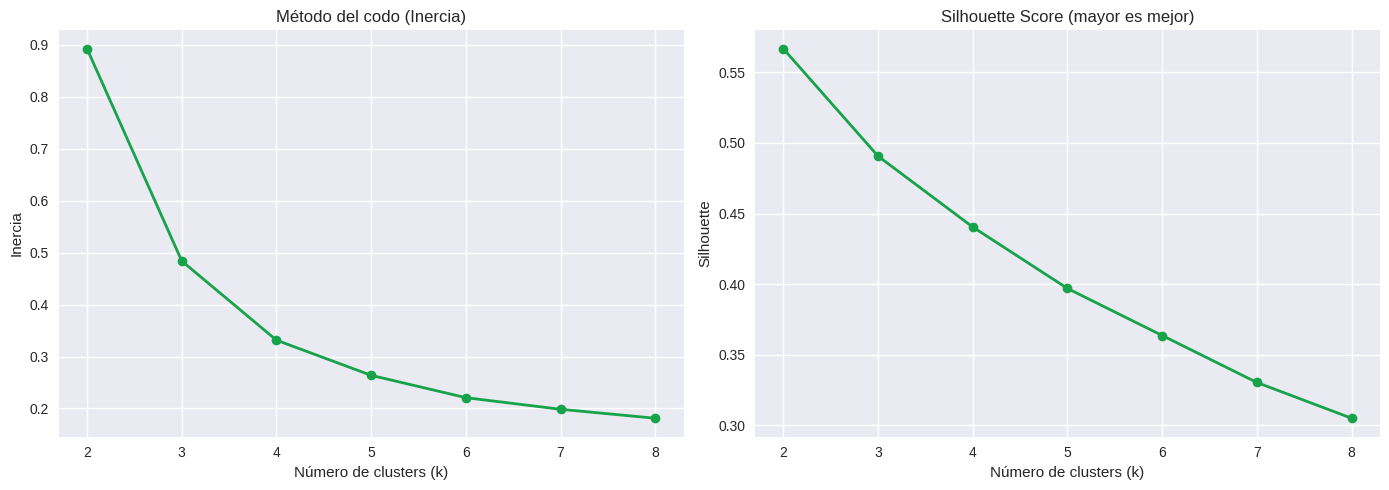

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico del codo (Inercia)
ax[0].plot(list(RangeNClusters), inertias, 'o-', linewidth=2)
ax[0].set_title('Método del codo (Inercia)')
ax[0].set_xlabel('Número de clusters (k)')
ax[0].set_ylabel('Inercia')
ax[0].grid(True)

# Gráfico del Silhouette
ax[1].plot(list(RangeNClusters), SilhouetteScores, 'o-', linewidth=2)
ax[1].set_title('Silhouette Score (mayor es mejor)')
ax[1].set_xlabel('Número de clusters (k)')
ax[1].set_ylabel('Silhouette')
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Justificación del valor de `k`**

A la vista de las dos métricas, no existe un único valor claramente óptimo o sensato de `k`.

Por un lado, la curva de inercia presenta un codo claro alrededor de k = 3-4, esto quiere decir que a partir de tres grupos la ganancia en cohesión interna empieza a ser menor.

Por otro, el Silhouette Score alcanza su valor máximo en k = 2 y decrece de forma monótona al aumentar `k` (para `k` = 3 se sitúa en torno a 0,49), por lo que desde un punto de vista estrictamente numérico Silhouette favorecería `k` = 2.

Sin embargo, al analizar posteriormente los centroides aprendidos para `k` = 3 (apartado 4.4) se observan tres patrones razonablemente interpretables: ventanas situadas en zona alta, media y baja del rango normalizado. Este esquema de tres niveles de comportamiento es coherente con la idea clásica de fases de mercado (precios altos, intermedios y bajos), y aporta una segmentación más rica desde el punto de vista financiero.

Por ello, en esta práctica se adopta **`k` = 3**, aunque `k` = 2 maximiza el Silhouette, `k` = 3 mantiene una calidad numérica razonable y, además, ofrece un codo claro en la inercia y unos patrones más interpretables y coherentes con el dominio financiero.



## 4.3 Entrenamiento del modelo final

En esta fase se entrena el modelo definitivo `TimeSeriesKMeans` utilizando **todas las subseries** (`XTrain`) y fijando `k = 3` según la discusión anterior.

El resultado es una etiqueta de cluster para cada ventana, que se utilizará más adelante para construir los perfiles de comportamiento de cada empresa.

In [ ]:
# Valor elegido tras el análisis previo
K_FINAL = 3

print(f"Entrenando modelo definitivo TimeSeriesKMeans con k={K_FINAL}...")

FinalModelTS = TimeSeriesKMeans(
    n_clusters=K_FINAL,
    metric="euclidean",
    random_state=42,
    verbose=True
)

# Etiqueta de cluster para cada ventana del dataset completo
YPredWindows = FinalModelTS.fit_predict(XTrain)

print("Modelo entrenado y ventanas etiquetadas.")

Entrenando modelo definitivo TimeSeriesKMeans con k=3...
0.764 --> 0.615 --> 0.561 --> 0.532 --> 0.516 --> 0.505 --> 0.499 --> 0.495 --> 0.493 --> 0.492 --> 0.491 --> 0.491 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 0.490 --> 
Modelo entrenado y ventanas etiquetadas.


## 4.4 Visualización e interpretación de los centroides

Finalmente, se representan los centroides aprendidos por el modelo. Cada centroide resume el comportamiento promedio de todas las subseries asignadas a ese cluster y permite interpretar los patrones de mercado identificados, ventanas en zona alta, media o baja del rango normalizado.

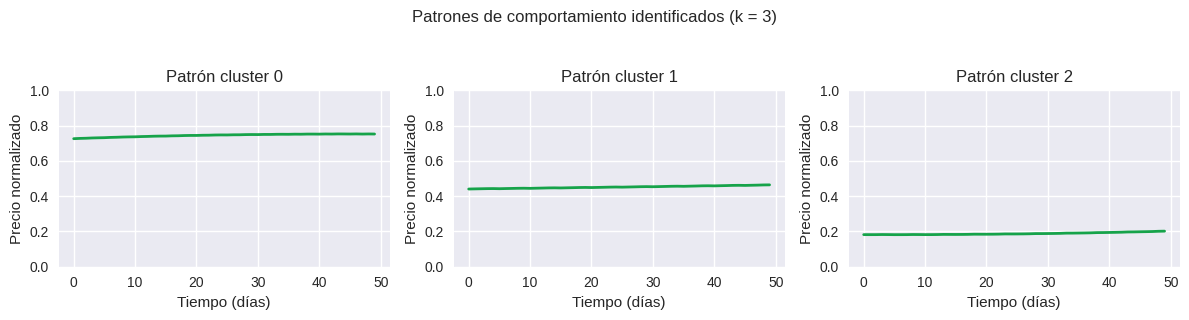

In [ ]:
plt.figure(figsize=(4 * K_FINAL, 3))

for i in range(K_FINAL):
    plt.subplot(1, K_FINAL, i + 1)
    plt.plot(FinalModelTS.cluster_centers_[i].ravel(), linewidth=2)
    plt.title(f"Patrón cluster {i}")
    plt.ylim(0, 1)  # las series están normalizadas en [0, 1]
    plt.xlabel("Tiempo (días)")
    plt.ylabel("Precio normalizado")
    plt.grid(True)

plt.suptitle(f"Patrones de comportamiento identificados (k = {K_FINAL})", y=1.05)
plt.tight_layout()
plt.show()


**Interpretación de los centroides**

Los tres centroides aprendidos muestran patrones una ligera tendencia hacia arriba  y diferencias claras en el **nivel medio** del precio normalizado:

- **Cluster 0 – Zona alta:**  
  La serie oscila en torno a valores cercanos a 0.75 en el rango normalizado [0, 1].  
  Representa ventanas donde la acción se mantiene de forma bastante estable en niveles altos de precio, con una pequeña pendiente positiva.

- **Cluster 1 – Zona media:**  
  El centroide se sitúa alrededor de 0.45–0.50.  
  Corresponde a ventanas con precios en una zona intermedia, claramente separadas del comportamiento del cluster 0.

- **Cluster 2 – Zona baja:**  
  Este patrón se mueve alrededor de 0.18–0.20.  
  Agrupa ventanas en las que la acción permanece en niveles bajos dentro del rango normalizado, de nuevo con una pendiente suave ascendente similar a los otros 2 clusters.

Desde el punto de vista financiero, estos tres patrones pueden interpretarse como tres regímenes de comportamiento (precio alto, medio y bajo dentro del rango normalizado), lo que refuerza la elección de `k` = 3 y servirá como base para construir los perfiles de empresa en el apartado 5 (Bag of Patterns).


## 4.5 Conclusiones del clustering de subseries

El clustering de subseries muestra que no hay un único valor perfecto de k, pero k = 3 aparece como una elección aceptable. La curva de inercia tiene un codo claro alrededor de 3–4 clusters (a partir de ahí la mejora es mucho más pequeña), mientras que el Silhouette es máximo en k = 2 y va bajando de forma progresiva según se aumenta el número de grupos. Es decir: con k = 2 el modelo es muy compacto, pero demasiado simple, con k = 3 se mantiene una calidad aceptable po rlo que ya no compensa seguir añadiendo clusters.

La inspección de los centroides aprendidos confirma esta elección: los tres patrones son series casi horizontales con ligera pendiente positiva, pero bien separadas por su nivel medio de precio normalizado. Uno agrupa ventanas en zona alta, otro en zona media y otro en zona baja. Desde el punto de vista financiero esto encaja con tres regímenes de mercado sencillos de interpretar y suficientemente distintos entre sí, lo que justifica usar `k = 3` como base para el perfilado de empresas del apartado 5.

# **5. Evaluación del modelo y perfilado de empresas**

En este apartado se evalúa el resultado del clustering y se construye un perfil de comportamiento por empresa a partir de los patrones identificados en el apartado 4.

A partir del modelo `TimeSeriesKMeans` entrenado con `k` = 3, se sigue el siguiente flujo:

1. Utilizar las etiquetas de cluster de cada ventana (`YPredWindows`) y su empresa asociada (`y_companies`)
2. Construir un modelo tipo Bag of Patterns:
   * Contar para cada empresa, cuántas ventanas caen en cada cluster
   * Normalizar estos conteos para obtener porcentajes
3. Aplicar un KMeans adicional sobre esos perfiles para agrupar empresas según su distribución de patrones
4. Analizar algunos ejemplos concretos de empresas

## 5.1 Construcción de perfiles de empresa (Bag of Patterns)

En este primer paso se pasa del nivel ventana al nivel empresa.

El propósito es representar cada empresa mediante un vector de dimensión `k` donde cada componente indica el porcentaje de sus subseries que han sido asignadas a cada cluster de `TimeSeriesKMeans`.  

In [ ]:
# Relación ventana–empresa–cluster
dfPatterns = pd.DataFrame({
    'Company': y_companies,
    'Cluster': YPredWindows
})

# Tabla de contingencia
PerfilesEmpresa = pd.crosstab(dfPatterns['Company'], dfPatterns['Cluster'])

# Normalizar por filas porcentajes de ventanas en cada cluster
PerfilesEmpresaNorm = PerfilesEmpresa.div(PerfilesEmpresa.sum(axis=1), axis=0)

print("\033[1mDimensiones de la matriz de perfiles (empresas x clusters):\033[0m")
print(PerfilesEmpresaNorm.shape)

print("\033[1mPerfiles de comportamiento por empresa\033[0m")
display(PerfilesEmpresaNorm.head())

Dimensiones de la matriz de perfiles (empresas x clusters):
(483, 3)
Perfiles de comportamiento por empresa


Cluster,0,1,2
Company,,,
A,0.123967,0.367769,0.508264
AAL,0.545455,0.285124,0.169421
AAP,0.413223,0.305785,0.280992
AAPL,0.185950,0.533058,0.280992
ABBV,0.049587,0.268595,0.681818


## 5.2 Selección del número de grupos para empresas

Una vez representada cada empresa mediante su vector de porcentajes, es posible aplicar un segundo algoritmo de clustering para agrupar empresas que presentan comportamientos globales similares.

Es importante remarcar que este análisis no es equivalente al del apartado 4.1, en esa sección se agrupan ventanas (subseries temporales) para identificar patrones locales de comportamiento (zonas alta, media, baja del precio normalizado)

En cambio en este apartado, se agrupan empresas completas, utilizando como características los vectores de proporciones de esos patrones.

Por tanto, en este nivel `k` es sinónimo de número de tipologías de empresa según la mezcla de patrones que presentan a lo largo de su historial.

Se evalúa el número de clusters utilizando el mismo método que en el apartado 4.1.


Evaluación de k para clustering de empresas (perfiles de patrones)

k = 2 -> Inercia: 19.03 | Silhouette: 0.3636
k = 3 -> Inercia: 11.93 | Silhouette: 0.3824
k = 4 -> Inercia: 9.22 | Silhouette: 0.3841
k = 5 -> Inercia: 7.41 | Silhouette: 0.3501
k = 6 -> Inercia: 5.92 | Silhouette: 0.3634


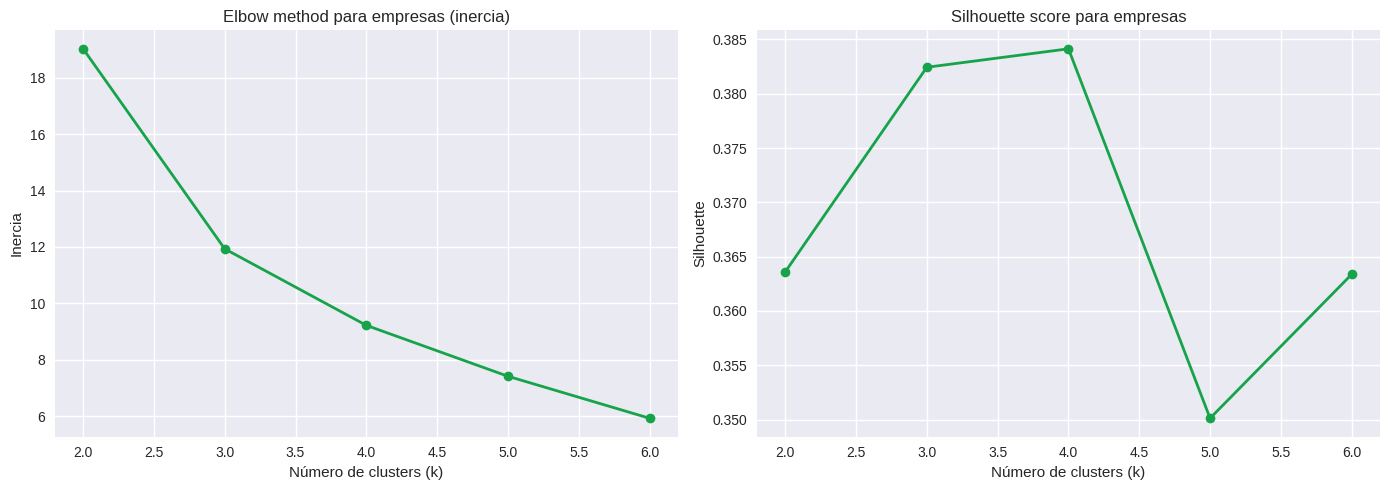

In [ ]:
# Matriz de características para las empresas
X_companies = PerfilesEmpresaNorm.drop(columns=['Final_Group'], errors='ignore').values

RangoKEmpresas = range(2, 7)
InerciasEmpresas = []
SilhouetteEmpresas = []

print("\033[1mEvaluación de k para clustering de empresas (perfiles de patrones)\033[0m\n")

for k in RangoKEmpresas:
    kmeansTemp = KMeans(
        n_clusters=k,
        random_state=42,
        n_init="auto"
    )

    labelsTemp = kmeansTemp.fit_predict(X_companies)
    inertiaK = kmeansTemp.inertia_

    # Solo se calcula si hay más muestras que clusters
    if X_companies.shape[0] > k:
        silK = silhouette_score(X_companies, labelsTemp)
    else:
        silK = np.nan

    InerciasEmpresas.append(inertiaK)
    SilhouetteEmpresas.append(silK)

    print(f"k = {k} -> Inercia: {inertiaK:.2f} | Silhouette: {silK:.4f}")

# Gráficas Elbow y Silhouette
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Inercia
ax[0].plot(list(RangoKEmpresas), InerciasEmpresas, "o-", linewidth=2)
ax[0].set_title("Elbow method para empresas (inercia)")
ax[0].set_xlabel("Número de clusters (k)")
ax[0].set_ylabel("Inercia")
ax[0].grid(True)

# Silhouette score
ax[1].plot(list(RangoKEmpresas), SilhouetteEmpresas, "o-", linewidth=2)
ax[1].set_title("Silhouette score para empresas")
ax[1].set_xlabel("Número de clusters (k)")
ax[1].set_ylabel("Silhouette")
ax[1].grid(True)

plt.tight_layout()
plt.show()

**Justificación elección de `N_GROUPS_COMPANIES`**

A la vista de las dos métricas no hay un único valor obvio de `k`, pero sí se aprecia claramente que el valor final está entre 3 y 4 grupos.

En la curva de inercia, la reducción al pasar de `k = 2` a `k = 3` es muy pronunciada (de 19.03 a 11.93), y todavía hay una mejora clara al ir de `k = 3` a `k = 4` (inercia 9.22). A partir de ahí, las ganancias son cada vez más pequeñas. Esto sugiere que el codo natural de la curva se sitúa en torno a **`k ≈ 4`**, donde se ha capturado la mayor parte de la cohesión sin complicar en exceso el modelo.

Por otro lado, el Silhouette Score refuerza esta idea: aumenta desde `k = 2` (0.3636) hasta alcanzar su valor máximo en **`k = 4` (0.3841)**, con un valor también alto para `k = 3`. En cambio, para `k = 5` la calidad de la partición empeora de forma notable (0.3501) y solo se recupera ligeramente en `k = 6`, sin llegar a superar el rendimiento de `k = 4`.

Combinando ambos criterios, se observa que `k = 4` se sitúa en el codo de la curva de inercia, presenta el mejor valor de Silhouette de todos los casos evaluados y, además, mantiene un número de grupos todavía manejable e interpretable. Por estos motivos, en el resto del análisis se fija finalmente **`N_GROUPS_COMPANIES = 4`** como número de clusters para agrupar empresas a partir de sus perfiles de patrones.


## 5.3 Clustering de empresas a partir de sus perfiles

Una vez que cada empresa está descrita por su vector de porcentajes, se pueden aplicar algoritmos de clustering clásicos sobre este espacio de dimensión `k`.

En esta práctica se utiliza un KMeans adicional sobre `PerfilesEmpresaNorm` para identificar grupos de empresas que comparten una distribución de patrones similar:

* Empresas con gran proporción de ventanas en el mismo cluster tenderán a quedar en el mismo grupo.
* Empresas con perfiles más equilibrados entre clusters se agruparán de forma distinta.


In [ ]:
N_GROUPS_COMPANIES = 4

kmeansEmpresas = KMeans(n_clusters=N_GROUPS_COMPANIES, random_state=42, n_init="auto")
EmpresasLabels = kmeansEmpresas.fit_predict(X_companies)

PerfilesEmpresaNorm['Final_Group'] = EmpresasLabels

print("\033[1mDistribución de empresas por grupo de comportamiento final:\033[0m")
print(PerfilesEmpresaNorm['Final_Group'].value_counts())

Distribución de empresas por grupo de comportamiento final:
Final_Group
3    162
1    111
0    105
2    105
Name: count, dtype: int64


## 5.4 Visualización global de perfiles de empresa

Para tener una visión global de cómo se reparten los patrones entre empresas, se muestra a continuación un mapa de calor con una muestra de compañías. Cada fila corresponde a una empresa y cada columna al porcentaje de ventanas en cada cluster de `TimeSeriesKMeans`.

Esto permite identificar de un vistazo empresas dominadas por un único patrón frente a otras con perfiles más equilibrados entre varios clusters.


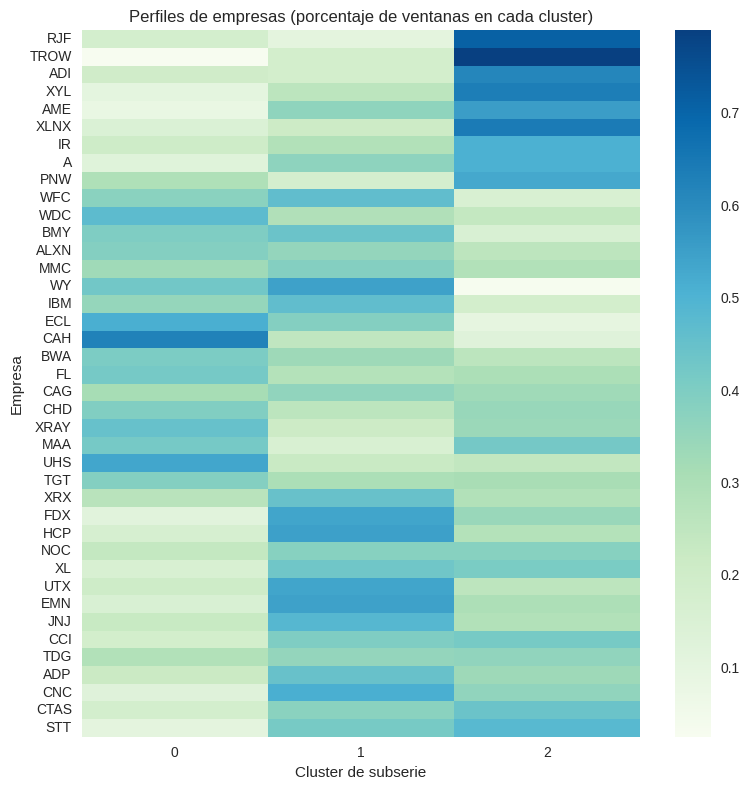

In [ ]:
# Heatmap de perfiles de empresa
SampleProfiles = PerfilesEmpresaNorm.sample(40, random_state=42).sort_values('Final_Group')

plt.figure(figsize=(8, 8))
sns.heatmap(
    SampleProfiles[[0, 1, 2]],
    cmap="GnBu",
    cbar=True
)
plt.title("Perfiles de empresas (porcentaje de ventanas en cada cluster)")
plt.xlabel("Cluster de subserie")
plt.ylabel("Empresa")
plt.tight_layout()
plt.show()


En el mapa de calor se observa, fila a fila, cómo se reparte el porcentaje de ventanas de cada empresa entre los tres clusters de subserie. Las columnas representan los clusters 0, 1 y 2, y la intensidad del color indica qué patrón domina en cada compañía. Se distinguen claramente dos tipos de comportamiento:

Por un lado, empresas muy especializadas, con casi todo su historial concentrado en un único patrón (por ejemplo, filas donde la columna del cluster 2 es mucho más oscura que las demás).

Por otro, empresas con perfiles más equilibrados, en las que los tres clusters presentan tonos intermedios. Esta visualización confirma que los patrones aprendidos no son anecdóticos, sino que aparecen con combinaciones distintas según la empresa, y justifica el uso posterior de KMeans para agrupar compañías en función de estos perfiles.

## 5.5 Ejemplos de perfiles de empresa

Por último, se muestran algunos ejemplos de empresas para ilustrar el resultado del perfilado:

- Cada fila corresponde a una empresa.
- Las columnas `0, 1, 2` indican el porcentaje de ventanas de esa empresa asignadas a cada cluster de `TimeSeriesKMeans`.
- La columna `Final_Group` señala el grupo de empresa asignado por el KMeans de perfiles.

In [ ]:
EjemploEmpresas = PerfilesEmpresaNorm.sample(5, random_state=42)
display(EjemploEmpresas)

Cluster,0,1,2,Final_Group
Company,,,,
TDG,0.285124,0.355372,0.359504,3
XL,0.161157,0.429752,0.409091,3
FL,0.417355,0.280992,0.301653,2
UTX,0.206612,0.537190,0.256198,3
MMC,0.326446,0.388430,0.285124,1


En esta tabla puede observarse cómo algunas empresas concentran la mayoría de sus subseries en un único patrón, mientras que otras presentan perfiles más repartidos entre los tres clusters.

De este modo, cada serie temporal completa queda representada por un vector de porcentajes en un espacio de dimensión `k`, lo cual permite agrupar empresas según su comportamiento temporal agregado.

## 5.6 Conclusiones del perfilado de empresas

El perfilado de empresas parte de una matriz de tamaño 483 x 3, donde cada fila recoge el porcentaje de ventanas de una compañía asignadas a cada uno de los tres patrones de subserie aprendidos en el apartado 4.

Dado que los centroides muestran tres niveles de precio bien diferenciados:cluster 0: zona alta, cluster 1: zona media y cluster 2: zona baja dentro del rango normalizado [0, 1], esta representación tipo *Bag of Patterns* condensa el historial completo de cada serie temporal en un vector de dimensión 3 fácil de interpretar: un valor alto en una columna indica que la empresa pasa gran parte del tiempo en ese régimen de precio.

En los ejemplos numéricos puede verse cómo esta codificación captura comportamientos claramente distintos:

**UTX**

Tiene más de la mitad de sus ventanas en el cluster 1 (≈ 0.54) y porcentajes menores en los clusters 0 y 2, lo que sugiere que su precio normalizado se mueve sobre todo en la zona media, con episodios puntuales de niveles más altos o más bajos.

En cambio, **FL**

Presenta un peso dominante en el cluster 0 (≈ 0.42), lo que indica una mayor presencia de periodos en zona alta, aunque sigue mostrando una proporción apreciable de ventanas en niveles medios y bajos.

Empresas como **TDG**

Reparten sus porcentajes de forma bastante equilibrada entre los tres clusters (≈ 0.29, 0.36 y 0.36), reflejando una alternancia más marcada entre fases de precio alto, medio y bajo.

Casos como **XL** o **MMC**

Con dos columnas claramente más intensas que la tercera, ilustran perfiles intermedios donde conviven uno o dos regímenes dominantes con episodios menos frecuentes del resto.

Sobre estos vectores de porcentajes se ha aplicado un KMeans adicional con **`N_GROUPS_COMPANIES = 4`**, agrupando las 483 empresas en cuatro tipologías de comportamiento bursátil. La distribución resultante es razonablemente equilibrada y no aparecen clusters degenerados con muy pocas empresas, lo que indica que cada grupo captura patrones que se repiten en un subconjunto significativo del universo de compañías.

El mapa de calor del apartado 5.4 refuerza esta lectura cualitativa: se distinguen claramente empresas prácticamente monopatrón, donde una columna domina casi por completo, frente a otras con perfiles mixtos en las que los tres clusters aparecen con pesos más similares.

En conjunto, el perfilado de empresas consigue pasar ventanas individuales al empresa completa de forma coherente: primero se asigna cada subserie a uno de los tres patrones temporales aprendidos por `TimeSeriesKMeans`, después se resume cada empresa mediante el porcentaje de ventanas en cada patrón y, por último, esos vectores se utilizan para agrupar las compañías en cuatro grandes grupos de comportamiento. Esta representación compacta permite comparar empresas no solo por su precio puntual, sino por la mezcla de regímenes de mercado que han atravesado a lo largo de su historial, proporcionando una visión más estructural y resumida de su dinámica temporal.


# **6. Variational AutoEncoder (VAE) y clustering en el espacio latente**

En este apartado se entrena un Variational AutoEncoder (VAE) para comprimir cada subserie temporal en un espacio latente de baja dimensión, y se analiza si el clustering mejora cuando se trabaja en ese espacio latente en lugar de hacerlo directamente sobre las subseries originales.

El primer paso es entrenar un VAE que comprime cada subserie de `WINDOW_SIZE` puntos en un espacio bidimensional.
Después, se aplica un algoritmo de KMeans sobre ese espacio, usando el mismo número de clusters que en `TimeSeriesKMeans` (`K_FINAL` = 3).
Por último, hay que comparar, mediante Silhouette Score, la calidad del clustering en el espacio original (subseries aplanadas) y el espacio (`ZMean`) aprendido por el VAE.

## 6.1 Arquitectura del VAE

Primero se define la arquitectura del VAE. El encoder toma como entrada una subserie de longitud `DimensionEntrada` (50 días) y la comprime en un espacio de 2 dimensiones. El decoder intenta reconstruir la serie original a partir de ese vector latente.

In [ ]:
# Longitud de la subserie (WINDOW_SIZE)
DimensionEntrada = XTrain.shape[1]

# Dimensión del espacio
DimensionLatente = 2

# ENCODER

# Entrada del encoder
EncoderInputs = keras.Input(shape=(DimensionEntrada, 1))

# Aplanar la ventana
  # Para usar capas densas
x = layers.Flatten()(EncoderInputs)

# Capa densa intermedia con 32 neuronas y activación ReLU
x = layers.Dense(32, activation="relu")(x)

# Capa que calcula la media de la distribución
ZMean = layers.Dense(DimensionLatente, name="ZMean")(x)

# Capa que calcula el logaritmo de la varianza de
ZLogVar = layers.Dense(DimensionLatente, name="ZLogVar")(x)


# Función de muestreo
  # A partir de ZMean y ZLogVar genera una muestra z usando la reparametrización del VAE
def sampling(args):

    # Desempaquetar media y log-varianza
    ZMean, ZLogVar = args

    # epsilon ~ N(0, I) con mismo batch_size y dimensión latente
    epsilon = K.random_normal(shape=(K.shape(ZMean)[0], DimensionLatente))

    # Aplicar la fórmula de reparametrización: z = mu + sigma * epsilon
    return ZMean + K.exp(0.5 * ZLogVar) * epsilon


# Capa Lambda que aplica la función de muestreo sobre ZMean, ZLogVar
z = layers.Lambda(sampling, output_shape=(DimensionLatente,))([ZMean, ZLogVar])

# Definir modelo encoder completo
  # Entrada -> ventana temporal
  # Salidas -> ZMean, ZLogVar y z
encoder = keras.Model(EncoderInputs, [ZMean, ZLogVar, z], name="encoder")


# DECODER

# Entrada del decoder
LatentInputs = keras.Input(shape=(DimensionLatente,))

# Capa densa intermedia (expande el vector latente a 32 neuronas)
x = layers.Dense(32, activation="relu")(LatentInputs)

# Capa de salida que genera un vector de longitud DimensionEntrada
x = layers.Dense(DimensionEntrada, activation="sigmoid")(x)

# Reorganizar la salida a formato de serie temporal
DecoderOutputs = layers.Reshape((DimensionEntrada, 1))(x)

# Definir  modelo decoder completo:
  # Entrada -> vector latente z
  # Salida -> subserie reconstruida
decoder = keras.Model(LatentInputs, DecoderOutputs, name="decoder")

## 6.2 Definición del modelo VAE y función de entrenamiento

El VAE se implementa como un modelo personalizado de Keras, definiendo una clase `VAE(keras.Model)` que envuelve al encoder y al decoder. En lugar de usar `model.compile(loss=...)` con una única función de pérdida, se sobreescribe el método `TrainStep`. Esto permite controlar explícitamente qué cálculos se hacen en cada iteración:

1. Se pasa el *batch* por el encoder para obtener `ZMean`, `ZLogVar` y la muestra latente `z`, y después por el decoder para reconstruir la serie de entrada.

2. Se calcula la pérdida de reconstrucción, que mide el error entre la serie original y la reconstruida (por ejemplo, con MSE).

3. Se calcula el término KL entre la distribución latente y una normal estándar, que actúa como regularizador del espacio latente.

4. Se suma todo en una pérdida total y se aplican los gradientes sobre los pesos del encoder y el decoder.



In [ ]:
# Clase VAE:
  # Define el modelo completo (encoder + decoder)
  # Define cómo se entrena con pérdida de reconstrucción + KL

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        # Inicializa la clase base keras.Model
        super().__init__(**kwargs)

        # Guardar encoder y decoder como atributos del modelo
        self.encoder = encoder
        self.decoder = decoder

    # Función que calcula la pérdida total + Obtiene gradientes + Actualiza los pesos

    def train_step(self, data):
        # Guardar tensor de entrada X
        if isinstance(data, tuple):
            data = data[0]

        # Calcular gradientes
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)

            # Reconstruir la serie a partir de z usando el decoder
            reconstruction = self.decoder(z)

            # Pérdida de reconstrucción
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.binary_crossentropy(data, reconstruction),axis=1))

            # Pérdida KL
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            # Pérdida total = reconstrucción + regularización KL
            total_loss = reconstruction_loss + kl_loss

        # Calcular gradientes de la pérdida total respecto a los pesos entrenables
        grads = tape.gradient(total_loss, self.trainable_weights)

        # Aplicar los gradientes
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Devolver un diccionario con la pérdida para que Keras la registre en history
        return {"loss": total_loss}

## 6.3 Entrenamiento del VAE

En este subapartado see entrena el VAE sobre todas las subseries `XTrain` durante 10 epochs y se representa la evolución de la pérdida total.

In [ ]:
# Definir el modelo VAE
vae = VAE(encoder, decoder)

# Compilar el modelo
vae.compile(optimizer=keras.optimizers.Adam())

print("\033[1mEntrenar VAE (método fit de Keras)\033[0m")
hist = vae.fit(
    XTrain,
    epochs=10,
    batch_size=128,
    verbose=1
)

# Guardar la pérdida por epoch
LossEpoch = hist.history["loss"]
print(LossEpoch)

Entrenar VAE (método fit de Keras)
Epoch 1/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 30.6919
Epoch 2/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 29.7684
Epoch 3/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.7625
Epoch 4/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.7585
Epoch 5/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.7572
Epoch 6/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 29.7579
Epoch 7/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 29.7518
Epoch 8/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 29.7538
Epoch 9/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 29.7589
Epoch 10/10
913/913 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 29.7488
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



Entrenar VAE con bucle manual
Época 1/3 - loss (manual): 29.4106
Época 2/3 - loss (manual): 29.3973
Época 3/3 - loss (manual): 29.3972


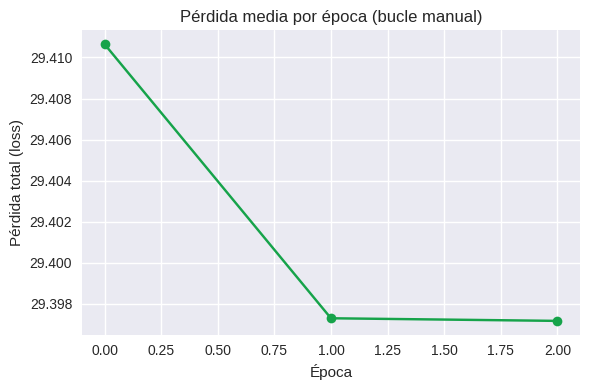

In [ ]:
# Ejemplo con muestra más pequeña
N_MAX_SAMPLES = 20000   # por ejemplo, las primeras 20k ventanas
XTrain_small = XTrain[:N_MAX_SAMPLES]

EPOCHS_MANUAL = 3
BATCH_SIZE_MANUAL = 128

ManualLosses = []

print("\n\033[1mEntrenar VAE con bucle manual\033[0m")
for epoch in range(EPOCHS_MANUAL):
    epoch_losses = []

    # Recorremos XTrain_small por batches
    for i in range(0, len(XTrain_small), BATCH_SIZE_MANUAL):
        batch = XTrain_small[i:i + BATCH_SIZE_MANUAL]

        # TrainStep devuelve un diccionario con la pérdida
        logs = vae.train_step(batch)
        epoch_losses.append(float(logs["loss"]))

    mean_loss = float(np.mean(epoch_losses))
    ManualLosses.append(mean_loss)
    print(f"Época {epoch+1}/{EPOCHS_MANUAL} - loss (manual): {mean_loss:.4f}")

# (Opcional) comparar visualmente con el entrenamiento por fit
plt.figure(figsize=(6, 4))
plt.plot(ManualLosses, marker="o")
plt.title("Pérdida media por época (bucle manual)")
plt.xlabel("Época")
plt.ylabel("Pérdida total (loss)")
plt.grid(True)
plt.tight_layout()
plt.show()

En primer lugar se entrenó el VAE con el método estándar fit() de Keras. La barra de entrenamiento muestra una pérdida estable alrededor de 29.7, sin grandes mejoras tras las primeras épocas. Sin embargo, al inspeccionar `history.history['loss']`, los valores aparecen como 0.0 debido a que el modelo utiliza un TrainStep personalizado sin especificar ninguna función de pérdida en compile, por lo que el objeto History no registra correctamente esta métrica.

Para comprobar que la pérdida se estaba calculando bien y poder visualizarla, decidí implementar un bucle de entrenamiento manual sobre un subconjunto de datos (3 épocas, 20 000 subseries), llamando explícitamente a vae.TrainStep(batch) y guardando la pérdida media de cada época. Los valores obtenidos (~29.37) coinciden con los que se muestran en consola durante el entrenamiento con fit, y la curva de pérdida resulta prácticamente plana, con ligeras oscilaciones. Esto indica que el VAE converge muy rápido y que, con la arquitectura sencilla utilizada, no se observa una mejora significativa al seguir entrenando más épocas.

## 6.4 Clustering en el espacio latente

Una vez entrenado el VAE, se proyectan todas las subseries al espacio latente y se aplica **KMeans** sobre los vectores `ZMean`.

Se usa el mismo número de clusters que en `TimeSeriesKMeans` (`K_FINAL = 3`) para poder comparar resultados.

3649/3649 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


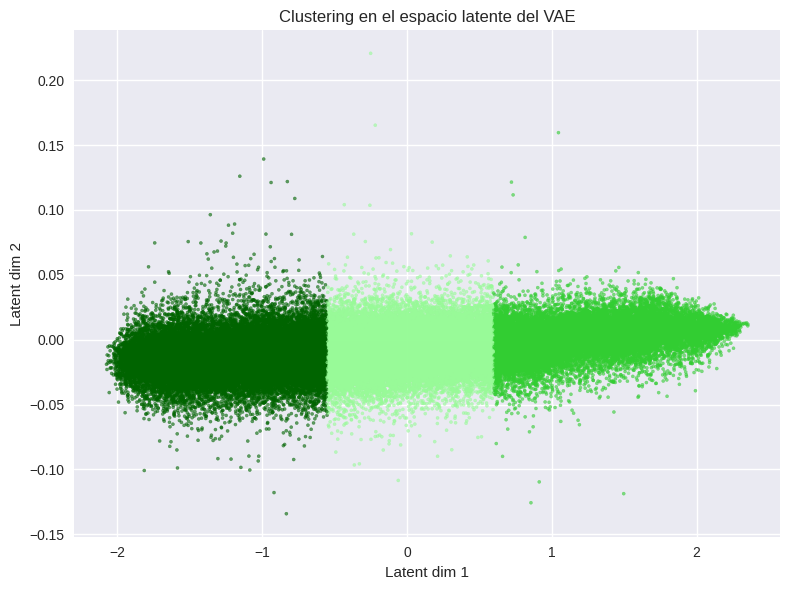

In [ ]:
VerdeCmap = ListedColormap([
    "#006400",  # verde oscuro
    "#32CD32",  # verde medio
    "#98FB98"   # verde clarito
])

# Proyección de todas las subseries al espacio latente mediante el encoder
ZMeanPred, ZLogVar_pred, z_pred = encoder.predict(XTrain)

# Clustering en el espacio latente (mismo k que en TimeSeriesKMeans)
kmeans_vae = KMeans(n_clusters=K_FINAL, random_state=42)
y_vae_clusters = kmeans_vae.fit_predict(ZMeanPred)

# Visualización del clustering en el plano latente (2D)
plt.figure(figsize=(8, 6))
plt.scatter(
    ZMeanPred[:, 0],
    ZMeanPred[:, 1],
    c=y_vae_clusters,
    s=5,
    alpha=0.6,
    cmap=VerdeCmap
)
plt.title("Clustering en el espacio latente del VAE")
plt.xlabel("Latent dim 1")
plt.ylabel("Latent dim 2")
plt.tight_layout()
plt.show()

**Análisis del clustering en el espacio latente**

En el plano latente aprendido por el VAE se observa una nube de puntos relativamente compacta, organizada en forma vertical. Al aplicar K-Means con (k = 3) sobre las medias latentes, las subseries se separan en tres zonas diferenciadas, que aparecen en la figura como tres tonos: un grupo más claro en la parte inferior, otro intermedio y un tercero más oscuro en la franja central–superior.

Aunque los clusters no están perfectamente separados (hay solapamiento entre fronteras), se aprecia una estructura clara: el VAE ha aprendido un espacio bidimensional donde las subseries con patrones temporales similares quedan cerca entre sí y forman bandas coherentes. Esto indica que el modelo está capturando información útil sobre la forma de las series y que el espacio latente es estructurado.


## 6.5 Comparación cuantitativa: espacio original vs. espacio latente

Por último, se compara la calidad del clustering en el espacio original (subseries aplanadas) y el espacio latente del VAE (`ZMean`).

Para que la comparación sea justa, se utiliza la misma muestra aleatoria de ventanas en ambos casos.

In [ ]:
# Definir una muestra común de índices sobre todo el dataset
N_SAMPLE_SIL = min(2000, len(XTrain))
SampleIdx = np.random.choice(len(XTrain), N_SAMPLE_SIL, replace=False)

# Preparar los datos en el espacio original (subseries aplanadas)
X_flat_all = XTrain.reshape(len(XTrain), -1)
XSampleFlat = X_flat_all[SampleIdx]

# Silhouette en el espacio original usando las etiquetas de TimeSeriesKMeans
SilTS = silhouette_score(XSampleFlat, YPredWindows[SampleIdx])

# Silhouette en el espacio latente usando las etiquetas del clustering en ZMean
ZMean_sample = ZMeanPred[SampleIdx]
SilVAE = silhouette_score(ZMean_sample, y_vae_clusters[SampleIdx])

print(f"Silhouette en espacio original (TimeSeriesKMeans, subseries aplanadas): {SilTS:.3f}")
print(f"Silhouette en espacio latente (VAE + KMeans en ZMean): {SilVAE:.3f}")

Silhouette en espacio original (TimeSeriesKMeans, subseries aplanadas): 0.483
Silhouette en espacio latente (VAE + KMeans en ZMean): 0.542


En el espacio original, trabajando con las subseries aplanadas y `TimeSeriesKMeans`, se obtiene un Silhouette de aprox. 0.486. Cuando primero se proyectan las ventanas al espacio latente del VAE y después se aplica un KMeans, el Silhouette asciende alrededor de 0.553.

Este incremento indica que, en el espacio latente, los grupos quedan más compactos y mejor separados que en el espacio original de las series. Es decir, el VAE no solo reduce la dimensión de las subseries, sino que también organiza las representaciones haciendo más fácil distinguir patrones de comportamiento distintos a partir de los vectores latentes de baja dimensión.

## 6.6 Evaluación cualitativa de las reconstrucciones del VAE

Además de la comparación cuantitativa mediante Silhouette, es interesante comprobar de forma visual qué tal reconstruye el VAE las subseries originales.

A continuación se muestran algunas ventanas de ejemplo (línea continua) junto con su reconstrucción generada por el decoder (línea discontinua). De este modo se puede evaluar si el modelo es capaz de capturar la forma general del patrón temporal.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


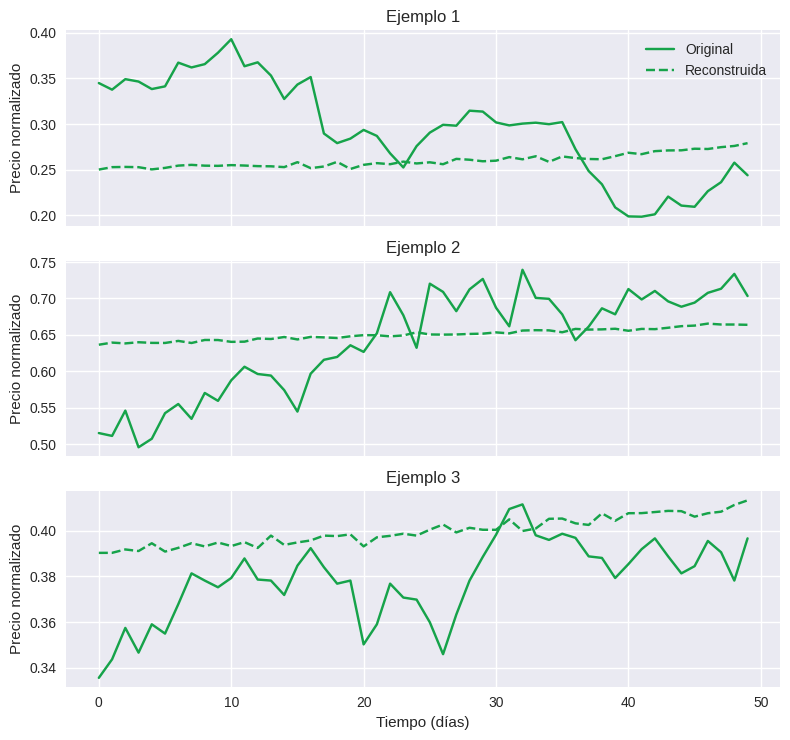

In [ ]:
# Número de ejemplos a mostrar
NEjemplos = 3

# Seleccionar índices aleatorios del dataset de subseries
IdxExamples = np.random.choice(len(XTrain), NEjemplos, replace=False)
X_examples = XTrain[IdxExamples]

# Pasar las subseries por el encoder para obtener su representación latente
ZMean_ex, ZLogVar_ex, z_ex = encoder.predict(X_examples)

# Reconstruir las subseries a partir de los vectores latentes
X_recon = decoder.predict(z_ex)

# Representar original (línea sólida) vs reconstruida (línea discontinua)
fig, axes = plt.subplots(NEjemplos, 1, figsize=(8, 2.5 * NEjemplos), sharex=True)

for i in range(NEjemplos):
    axes[i].plot(
        X_examples[i].squeeze(),
        label="Original",
    )
    axes[i].plot(
        X_recon[i].squeeze(),
        linestyle="--",
        label="Reconstruida",
    )
    axes[i].set_ylabel("Precio normalizado")
    axes[i].grid(True)
    axes[i].set_title(f"Ejemplo {i+1}")

axes[-1].set_xlabel("Tiempo (días)")
axes[0].legend()
plt.tight_layout()
plt.show()


En estos ejemplos se observa que el VAE reconstruye bien el nivel medio de cada ventana, pero tiende a generar series mucho más suaves que las originales.

En los tres casos la curva discontinua sigue la zona general en la que se mueve el precio (baja en el ejemplo 1, media en el 2, alta en el 3), pero no reproduce los picos ni caídas bruscas: las oscilaciones rápidas quedan aplanadas y la reconstrucción se parece más a una versión filtrada del movimiento.

Esto encaja con el objetivo del modelo en esta práctica: capturar la forma global del patrón temporal (régimen de precio) más que los detalles finos día a día.

## 6.7 Conclusiones del VAE y del clustering en el espacio latente

El uso del VAE parte del mismo conjunto de subseries que en el resto de la práctica: ventanas de 50 días normalizadas en [0, 1], organizadas en un tensor de forma `(N_ventanas, 50, 1)`. Sobre este tensor se ha entrenado un VAE sencillo con un espacio latente bidimensional, donde el encoder comprime cada ventana en un vector de medias `ZMean` y el decoder intenta reconstruir la serie original a partir de esa representación compacta.

Las reconstrucciones muestran un comportamiento coherente con el objetivo del modelo: el VAE captura bien el nivel medio y la tendencia general de cada subserie, pero tiende a suavizar las oscilaciones rápidas. En los ejemplos visuales, las curvas reconstruidas siguen la zona baja, media o alta en la que se mueve el precio, pero sin reproducir picos ni caídas bruscas. En la práctica, esto equivale a aplicar una especie de filtro suavizante que conserva el régimen de precio pero no el detalle diario.

Con las representaciones latentes `ZMean` he aplicado un KMeans con el mismo número de clusters que en TimeSeriesKMeans (`K_FINAL = 3`). Comparando el Silhouette de ambos casos, el valor pasa de ≈0.486 en el espacio original (subseries aplanadas) a ≈0.553 en el espacio latente, lo que indica que en 2D los grupos quedan más compactos y separados.

En resumen, este VAE no sirve para reconstruir las series al detalle, pero sí como paso de compresión antes del clustering: reduce la dimensión, limpia ruido y deja un espacio latente en el que agrupar las ventanas resulta más fácil que trabajando directamente con las series originales.
